In [2]:
import pandas as pd

df = pd.read_csv('weather_features.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    8500 non-null   float64
 1   precipitation  8500 non-null   float64
 2   wind_speed     8500 non-null   float64
dtypes: float64(3)
memory usage: 199.3 KB


,temperature,precipitation,wind_speed
count,8500.000000,8500.000000,8500.000000
mean,17.243376,10.000424,25.475094
std,12.999805,5.773801,14.382536
min,-5.000000,0.000000,0.000000
25%,5.900000,5.000000,13.200000
50%,17.200000,10.000000,25.700000
75%,28.400000,15.100000,37.700000
max,40.000000,20.000000,50.000000


In [3]:
df.columns = ["temperature", "precipitation", "wind_speed"]


In [4]:
import numpy as np

# Simulate delay (in hours) using a simple weather-driven rule
df["delay_hours"] = (
    (df["temperature"] > 35).astype(int) * np.random.uniform(1, 4, size=len(df)) +
    (df["precipitation"] > 10).astype(int) * np.random.uniform(2, 6, size=len(df)) +
    (df["wind_speed"] > 30).astype(int) * np.random.uniform(1, 5, size=len(df))
).round(1)

# Optional: clip delay_hours to a max of 24
df["delay_hours"] = df["delay_hours"].clip(upper=24)

# Save as training dataset
df.to_csv("weather_with_delay.csv", index=False)


In [5]:
df.head()

,temperature,precipitation,wind_speed,delay_hours
0,11.9,8.5,40.6,3.5
1,37.8,6.2,33.9,5.7
2,27.9,5.6,44.5,4.1
3,21.9,19.4,22.5,4.3
4,2.0,3.1,44.7,4.7


In [6]:
df["risk_score"] = df["delay_hours"] / 24  # normalized 0–1


In [12]:
df["risk_level"] = pd.cut(
    df["risk_score"],
    bins=[-0.01, 0.3, 0.7, 0.9],
    labels=["low", "medium", "high"]
)


In [13]:
df.head()

,temperature,precipitation,wind_speed,delay_hours,risk_score,risk_level
0,11.9,8.5,40.6,3.5,0.145833,low
1,37.8,6.2,33.9,5.7,0.237500,low
2,27.9,5.6,44.5,4.1,0.170833,low
3,21.9,19.4,22.5,4.3,0.179167,low
4,2.0,3.1,44.7,4.7,0.195833,low


In [14]:
print(df["risk_level"].value_counts())


risk_level
low       7569
medium     931
high         0
Name: count, dtype: int64


In [15]:
print(df["risk_level"].isnull().sum())


0


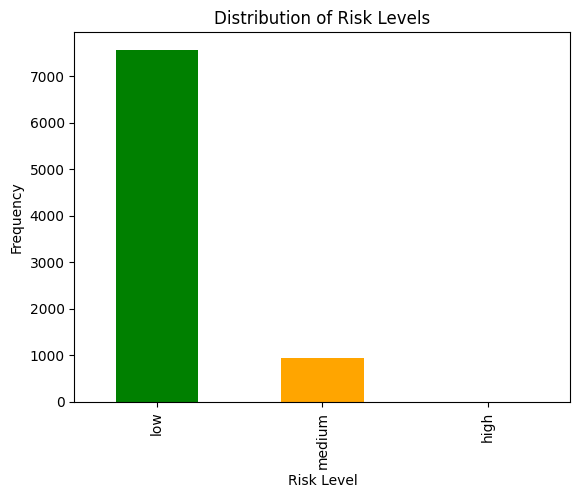

In [16]:
import matplotlib.pyplot as plt

df["risk_level"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.show()


In [17]:
high_risk_df = df[df["risk_level"] == "high"]


In [18]:
df.to_csv("final_dataset_with_risk.csv", index=False)


In [19]:
avg_temp_by_risk = df.groupby("risk_level")["temperature"].mean()
print(avg_temp_by_risk)


risk_level
low       16.701361
medium    21.649946
high            NaN
Name: temperature, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_18084\2500787349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_by_risk = df.groupby("risk_level")["temperature"].mean()
